# 机器学习之DBSCAN算法

#### 【简介】

**DBSCAN**是属于机器学习里面的**非监督学习**算法，与k-means一样是一种**聚类**算法。不过**k-means算法**是**基于距离**的**聚类算法**，基于距离的聚类算法的聚类结果是球状的簇，当数据中的聚类结果是非球状结构时，基于距离的聚类算法的效果并不好，然而，**基于密度**的聚类算法从**样本的密度**角度来考察样本之间的**可连接性**，并**基于可连接样本**不断**扩展聚类簇**以获得最终的聚类结果，它**可以发现任意形状的簇**。

**DBSCAN** (density-based spatial clustering of applications with noise)，即“具有噪声的基于密度的空间聚类应用”。是一种典型的**基于密度的聚类算法**。

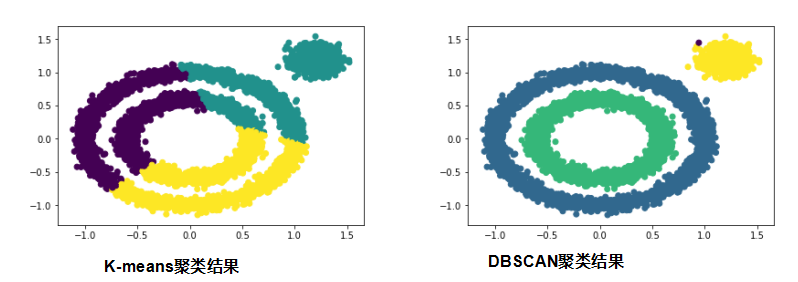

#### 【目录】

1. [DBSCAN算法的基本概念](#1.-DBSCAN算法的基本概念)
2. [DBSCAN算法流程](#2.-DBSCAN算法流程)
3. [sklearn中的DBSCAN](#3.-sklearn中的DBSCAN)

## 1. DBSCAN算法的基本概念

### 基本概念

在DBSCAN算法中，有两个基本的领域参数，分别为eps邻域和Minpts。

- **eps邻域**：表示的是在数据集D中与样本点$x_i$的距离不大于eps的样本。

样本点$x_i$的eps邻域如图所示：

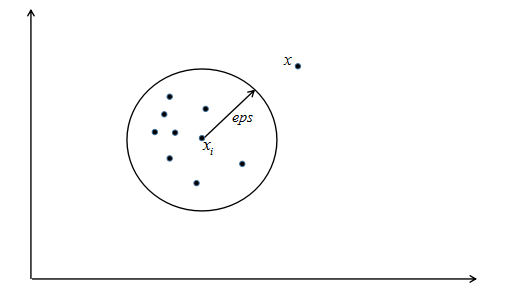

在图中，样本点$x$不在样本点$x_i$的eps邻域内。$x_i$的密度由$x_i$的eps邻域内的点的数量来估计。Minpts表示的是在样本点$x_i$的eps邻域内的最少样本点数目。基于邻域参数**eps**和**Minpts**，在DBSCAN算法中将数据点分为一下三类：

1. **核心点**：若样本$x_i$的eps邻域内至少包含了Minpts个样本，则称样本点$x_i$为核心点。
2. **边界点**：若样本$x_i$的eps邻域内包含的样本数目小于Minpts，但是它在其它核心点的邻域内，则称样本点$x_i$为边界点。
3. **噪音点**：指的是既不是核心点，又不是边界点的点。

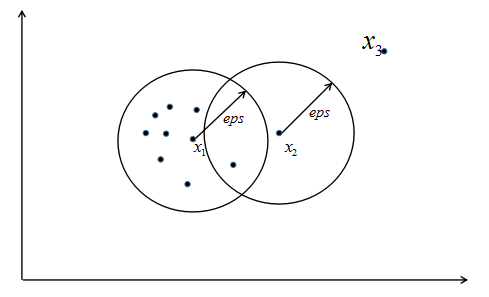

如上图，设置Minpts的值为8，对应的样本点$x_1$的eps邻域内包含了9个点，大于Minpts，则样本点$x_1$为核心点。样本点$x_2$在样本点$x_1$的eps邻域内，且样本点$x_2$的eps邻域内只包含了2个样本点，小于 Minpts，则样本点$x_2$为边界点。样本点$x_3$为噪音点。

在 DBSCAN 算法中，还定义了如下的一些概念：

1. **直接密度可达**：若样本点$x_j$在核心点$x_i$的eps邻域内，则称样本点$x_j$从样本点$x_i$直接密度可达。
2. **密度可达**：若在样本点$x_1$和样本点$x_n$之间存在一序列

$$
   x_2,..,x_{n−1}
$$

   且$x_{i+1}$从$x_i$直接密度可达，则称$x_n$从$x_1$密度可达。

3. **密度相连**：对于样本点$x_i$和样本点$x_j$，若存在样本点$x_k$，使得$x_i$和$x_j$都从$x_k$密度可达，则称$x_i$和$x_j$密度相连。

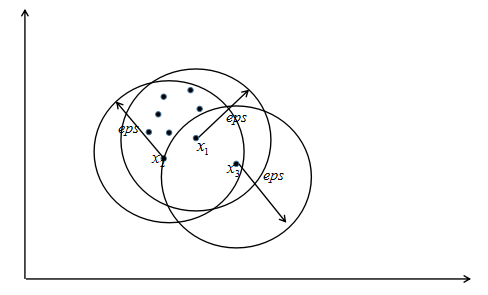

如上图，设置**Minpts**的值为8，则样本点$x_1$和$x_2$都是**核心点**，样本点$x_3$为**边界点**。样本点$x_2$在核心点$x_1$eps邻域内，则样本点$x_2$从样本点$x_1$**直接密度可达**。样本点$x_3$在在核心点$x_2$eps邻域内，则样本点$x_3$从样本点$x_2$**直接密度可达**。样本点$x_1$和$x_3$之间存在样本点$x_2$，且样本点$x_2$从样本点$x_1$直接密度可达，则样本点$x_3$从样本点$x_1$**密度可达**。

## 2. DBSCAN算法流程

### 任务描述

使用Python实现DBSCAN算法，并对信用卡用户进行聚类，这里你不仅需要找出异常用户，还要将行为相似的用户划分为一组。

### 相关知识

为了完成本任务，需要掌握：

1. DBSCAN算法原理
2. DBSCAN算法流程 
3. DBSCAN算法优点

#### 数据集介绍

本任务我们使用sklearn中的datasets.make_circles方法自己制作了一份数据，一共100个样本。这100个样本不提供标签，你需要使用 DBSACN 算法对其进行聚类，数据分布如下图：

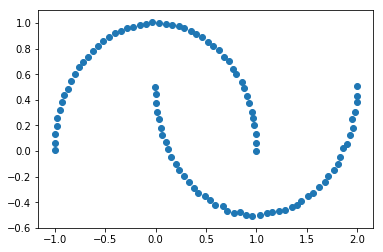

#### DBSCAN算法原理

**基于密度的聚类算法**通过**寻找被低密度区域分离的高密度区域**，并将高密度区域作为一个簇。在DBSCAN算法中，聚类簇定义为：**由密度可达关系导出的最大的密度相连样本集合**。

#### DBSCAN算法流程

在DBSCAN算法中，由**核心对象**出发，**找到**与该核心对象**密度可达**的所有样本形成一个**聚类簇**。DBSCAN算法流程如下：

1. 如果一个点的eps邻域包含多于MinPits个对象，则创建一个集合P作为核心对象的新簇
2. 寻找核心对象的直接密度可达的对象，并合并为一个新的簇
3. 直到没有点可以更新簇时算法结束

过程如下图：

![DBSCAN流程](https://static.leiphone.com/uploads/new/sns/article/201901/1546583874689906.gif)

#### DBSCAN算法优点

根据**DBSCAN算法原理及流程**可以发现，DBSCAN算法在聚类时**不需要**自己**设定簇的个数**，而且能够发现**任意形状的簇**。还有一个优点就是，DBSCAN算法**对噪音点不敏感**，所以DBSCAN算法也常用来找寻异常数据。

### 实操练习

#### 编程要求

根据提示，补充下列Python代码，实现DBSCAN算法，并对信用卡用户进行聚类。

#### 测试说明

返回聚类结果，输出聚类后每个类别的吻合度，应高于95%。

In [23]:
import numpy as np
import random
#寻找eps邻域内的点
def findNeighbor(j, X, eps):
    N=[]
    for p in range(X.shape[0]):   #找到所有领域内对象
        temp=np.sqrt(np.sum(np.square(X[j]-X[p])))   #欧氏距离
        if(temp<=eps):
            N.append(p)
    return N
#dbscan算法
def dbscan(X, eps, min_Pts):
    '''
    input:X(ndarray):样本数据
          eps(float):eps邻域半径
          min_Pts(int):eps邻域内最少点个数
    output:cluster(list):聚类结果
    '''
    #********* Begin *********#
    k = -1
    NeighborPts = []      #array,某点领域内的对象
    Ner_NeighborPts = []
    fil = []                                      #初始时已访问对象列表为空
    gama = [x for x in range(len(X))]            #初始时将所有点标记为未访问
    cluster = [-1 for y in range(len(X))]
    while len(gama)>0:
        j = random.choice(gama)
        gama.remove(j)  #未访问列表中移除
        fil.append(j)   #添加入访问列表
        NeighborPts = findNeighbor(j, X, eps)
        if len(NeighborPts) < min_Pts:
            cluster[j] = -1
        else:
            k = k + 1
            cluster[j] = k
            for i in NeighborPts:
                if i not in fil:
                    gama.remove(i)
                    fil.append(i)
                    Ner_NeighborPts = findNeighbor(i, X, eps)
                    if len(Ner_NeighborPts) >= min_Pts:
                        for a in Ner_NeighborPts:
                            if a not in NeighborPts:
                                NeighborPts.append(a)
                    if (cluster[i] == -1):
                        cluster[i] = k
    #********* End *********#
    return cluster

In [50]:
# 测试代码
from sklearn import datasets
from sklearn.metrics import accuracy_score
X, y = datasets.make_moons(n_samples=100, noise=0.005, random_state=666)

y_pred = dbscan(X, eps=0.5, min_Pts=10)

acc = accuracy_score(y, y_pred)

print('聚类的吻合度：{:.2f}%'.format(acc * 100))

聚类的吻合度：99.00%


## 3. sklearn中的DBSCAN

### 任务描述

调用 sklearn 中的 DBSCAN 模型，对非球状数据进行聚类。

### 相关知识

为了完成本任务，需要掌握：DBSCAN。

#### 数据集介绍

在这里，我们使用sklearn中的datasets.make_circles方法自己制作了一份数据，一共100个样本。这100个样本不提供标签，你需要使用 DBSACN 算法对其进行聚类，数据分布如下图：

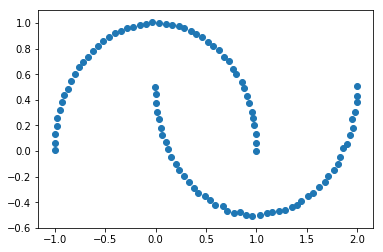

数据生成代码：

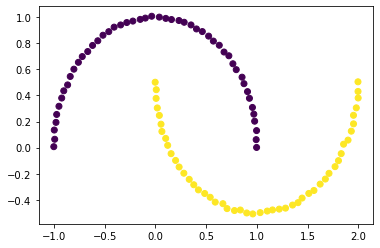

In [18]:
import matplotlib.pyplot as plt

from sklearn import datasets
X,y = datasets.make_moons(n_samples=100, noise=0.005, random_state=666)

plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

#### DBSCAN

DBSCAN的构造函数中有两个常用的参数可以设置：

- **`eps`**：eps邻域半径大小；

- **`min_samples`**：即Minpts，eps邻域内样本最少数目

和`sklearn`中其他聚类器一样，`DBSCAN`不允许对新的数据进行预测，`DBSCAN`类中的`fit_predict`函数用于训练模型并获取聚类结果，`fit_predict`函数有一个向量输入：

- **`X`**：大小为`(样本数量,特征数量)`的`ndarray`，存放训练样本。

`DBSCAN`的使用代码如下：

In [57]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=10)
result = dbscan.fit_predict(X)
result

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

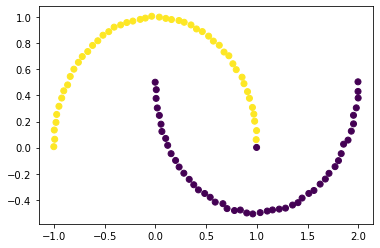

In [58]:
plt.scatter(X[:,0],X[:,1], c = result)
plt.show()

### 实操练习

#### 编程要求

填写`data_cluster(data)`函数完成非球状数据聚类任务，其中：

- `data`：数据样本。

#### 测试说明

返回聚类结果，输出聚类后每个类别的吻合度，应高于95%。

In [62]:
from sklearn.cluster import DBSCAN
def data_cluster(data):
    '''
    input: data(ndarray) :数据
    output: result(ndarray):聚类结果
    '''
    #********* Begin *********#
    result = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(data)
    return result
    #********* End *********#

In [63]:
# 测试代码
from sklearn import datasets
from sklearn.metrics import accuracy_score
X, y = datasets.make_moons(n_samples=100, noise=0.005, random_state=66)

y_pred = data_cluster(X)
acc = accuracy_score(y, y_pred)

print('聚类的吻合度：{:.2f}%'.format(acc * 100))

聚类的吻合度：99.00%


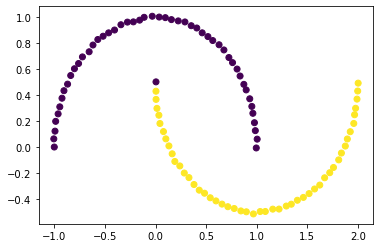

In [64]:
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.show()